# Çalışmayı Hazırlayanlar: Furkan Karakuz ve Oğuzhan Akkurt
# Verilerin alındığı yerler: İnvesting ve Hazine Bakanlığı

* Gerekli kütüphaneleri ve veri setini yükleyerek başlıyoruz.

* Veri setimiz 2015-01-01'den 2020-11-01 kadar olan aylık işsizlik oranlarını kapsamaktadır.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline    
import warnings
warnings.filterwarnings('ignore')
plt.style.use('Solarize_Light2') 
from pylab import rcParams  


tr_işsizlik = pd.read_excel(r"C:\Users\LENOVO\Desktop\STAJ\turkiye_2015_2020_enf_işsizlik.xlsx",sheet_name="İşssizlik")
tr_işsizlik["Açıklanan_İşsizlik"] = tr_işsizlik["Açıklanan_İşsizlik"]*100

* Ardından zaman değişkeninin sıralanmasını ve zamanını Yıl-Ay-Gün olacak şekilde düzenliyoruz. 

In [74]:
df1 = tr_işsizlik.copy()
df1["TIME"] = df1["Yayınlanma Tarihi"]
df1.drop("Yayınlanma Tarihi",axis=1,inplace=True)
new = df1["TIME"].apply(lambda dt: dt.replace(day=1))
df1.index = new
df1 = df1.drop("TIME",axis=1)
df1 = df1[::-1]
df1.head(3)

,Açıklanan_İşsizlik
TIME,
2015-01-01,11.3
2015-02-01,11.2
2015-03-01,10.6


* Zaman aralığı aşağıdaki kod bloğunda daha detaylı şekilde gözükmektedir.

In [75]:
df1.index

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2016-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2017-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2018-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2019-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
      

## The Augmented Dickey-Fuller bir diğer ismiyle Birim Kök Testi Uygulanması 

* Birim Kök Testi bizim için önemli bir testtir. Kullanım amacı genel olarak serinin durağan olup olmadığını anlamamızı sağlar.

* Serimiz durağan değilse tahmin sonucunu iyileştirmek için durağan hale getirmemiz gerekir.

* Serimizin durağan olup olmadığını anlayabileceğimiz bir fonksiyon ile devam edelim.

In [118]:
from statsmodels.tsa.stattools import adfuller
def testStationarity(ts):
    dftest = adfuller(ts)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

testStationarity(df1["Açıklanan_İşsizlik"])

Test Statistic                 -1.499664
p-value                         0.533678
#Lags Used                     10.000000
Number of Observations Used    60.000000
Critical Value (1%)            -3.544369
Critical Value (5%)            -2.911073
Critical Value (10%)           -2.593190
dtype: float64

* P-değeri > 0.05 olarak bulunmuştur. Buda serinin durağan olmadığını göstermektedir.

* Bu durumda durağanlığın olmadığını düşünerek parametre seçimi yapmamız gerekmekte.

## Uygun Parametrelerin Bulunması AUTO_ARIMA(otomatik parametre bulma) 

* Bazı parametreleri bulmamız gerekiyor. Örneğin AR (p) otoregresif süreç, MA (q) hareketli ortalama süreci ve fark alma durumu(d ile gösterilir).

* Bunları belirlerken serimizin durağan olmadığını göz önüne alarak AUTO_ARIMA içerisinde bulunan SEASONAL(mevsimsellik) parametresine TRUE diyoruz.


In [119]:
from pmdarima.arima import auto_arima
results = auto_arima(df1, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.59 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=84.979, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=45.550, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.43 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=66.735, Time=0.07 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=62.633, Time=0.23 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.97 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.45 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.60 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=49.212, Time=0.12 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=40.933, Time=0.28 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=66.292, Time=0.17 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=42.348, Time=0.81 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=41.806, Time=0.66 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=inf, Time=0.68 sec


In [120]:
results.aic()

33.89035211684592

* Elde edilen sonuçlara göre bizim için en iyi ARIMA modeli ARIMA(3,1,0).

* Bunun sebebi ARIMA modeli belirlenirken genellikle AIC(Akaike Bilgi Kriteri) göz önüne alınır ve en düşük olan seçilir.


## Model Eğitimi ve Serinin Durağanlığı

* Model öncesinde gerekli olan parametreleri elde ettik. 

* Bunları kullanarak uygun bir model oluşturacağız ve durağanlık sıkıntısını çözmüş olacağız.

In [122]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df1,
                                order=(3,1,0),
                                seasonal_order=(1,1,0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

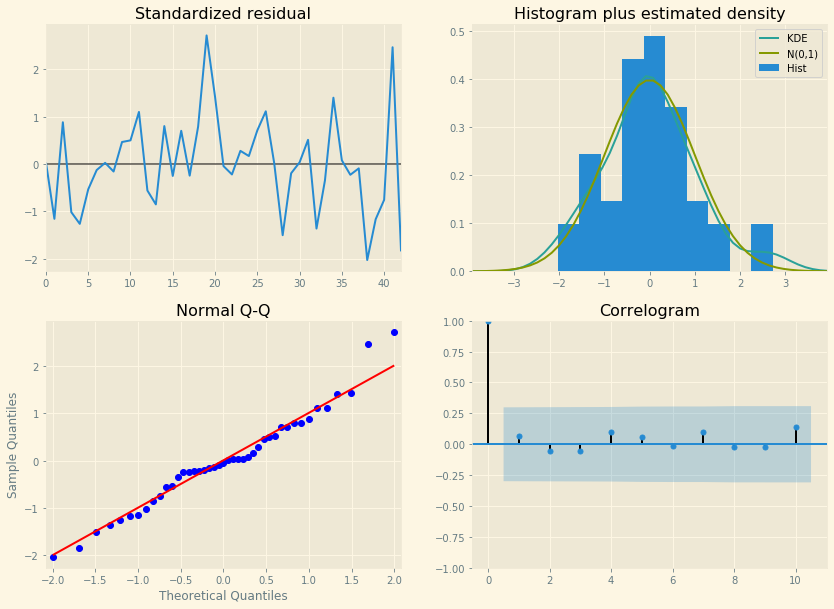

In [123]:
results.plot_diagnostics(figsize=(14,10))
plt.show()

* Serimizin artık durağan olduğunu görebiliyoruz.

* Korelogram, Q-Q Plot, Histogram, Standartlaştırılmış Hatalar tüm grafikler de belirli bir ortalama etrafında dağılan bir serimiz olduğu gözükmekte.

## Sonuçların Tahmin Edilmesi ve Öngörü

* İlk önce modelimizin var olan değerleri tahmin etme gücünü göreceğiz.

* Ardından 3 aylık bir öngörü tahmini gerçekleştireceğiz.

In [128]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-01'),dynamic=False)
pred_ci = pred.conf_int()

In [129]:
pred_ci['Predicted'] = (pred_ci['lower Açıklanan_İşsizlik'] + pred_ci['upper Açıklanan_İşsizlik'])/2
pred_ci['Observed'] = df1['Açıklanan_İşsizlik']
pred_ci['Diff, %%'] = ((pred_ci['Predicted'] / pred_ci['Observed'])-1) * 100
pred_ci.tail(8)

,lower Açıklanan_İşsizlik,upper Açıklanan_İşsizlik,Predicted,Observed,"Diff, %%"
TIME,,,,,
2020-04-01,12.186987,13.365727,12.776357,12.8,-0.184711
2020-05-01,12.378723,13.557463,12.968093,12.9,0.527853
2020-06-01,12.838008,14.016748,13.427378,13.4,0.204312
2020-07-01,13.419831,14.598571,14.009201,13.4,4.546274
2020-08-01,12.960680,14.139420,13.550050,13.2,2.651896
2020-09-01,12.338032,13.516772,12.927402,12.7,1.790569
2020-10-01,12.069461,13.248201,12.658831,13.4,-5.531110
2020-11-01,13.264992,14.443732,13.854362,13.3,4.168134


* Tahmin işlemini gerçekleştirdik. Gerçekleştirdiğimiz işlem sonrası sonuçları şu şekilde değerlendirebiliriz.

* Lower ve Upper yani Açıklanmış Olan İşsizlik oranına ait alt-üst sınırı sonuçlarını göstermekte.

* Predcited kolonu ise tahminleri gösterirken Observed gerçekte doğru olan değerleri ifade etmektedir.

* Diff kolonu ise yüzde cinsinden tahmin edilen ve gerçek olan değerler arasındaki farkı ifade etmektedir.

## Öngörü(Forecast) İşleminin Yapılması

* Öngörü işlemi, Tahmin(Predict) işleminden farklı olarak yt+1 demektir. Bunun anlamı ise var olan zamanın 1 sonraki döneminin tahmin edilmesidir.

* Genellikle Tahmin(Predict) işlemin de girdiler verilir ve sonuçlar elde edilir. Öngörü(Forecast) işleminde ise seriden yola çıkarak ve varsa diğer değişkenler ile bir zaman ilerisi tahmin edilmeye çalışılır.

In [130]:

pred_uc = results.get_forecast(steps=3)


pred_ci = pred_uc.conf_int()

In [134]:
value = pred_uc.predicted_mean.copy() 
value.index = pd.DatetimeIndex(["2020-12-01","2021-01-01","2021-02-01"])
value = pd.DataFrame(value)
value.columns = ["Tahmin"]
value

,Tahmin
2020-12-01,14.873072
2021-01-01,15.350952
2021-02-01,15.779963


* 3 aylık öngörü tahminini gerçekleştirdik. Elde ettiğimiz değerler 2020 Kasım ayı sonrası içindir.

* Gelecek 3 ay için artan bir işsizlik oranı beklenmekte. 

## Sonunçların Grafikte Gösterilmesi

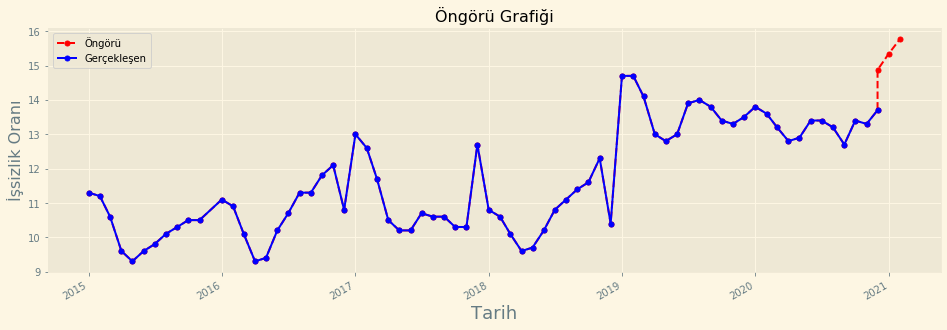

In [145]:
deneme=value.copy()
deneme.columns=["Açıklanan_İşsizlik"]
dff=pd.concat([df1,deneme])
plt.figure(figsize=(16,5))
dff["Açıklanan_İşsizlik"].plot(title="Öngörü Grafiği",color="r",marker=".",ms=10,ls="--")
df1["Açıklanan_İşsizlik"].plot(color="b",marker=".",ms=10,ls="-")
plt.xlabel('Tarih', fontsize=18)
plt.ylabel('İşsizlik Oranı', fontsize=16)
plt.legend(["Öngörü","Gerçekleşen"],loc="upper left")

* 2020 Aralık ayı itibariyle işsizlikte öngörü sonuçlarına göre bir artış gözükmekte.

* Bunu etkileyen birçok faktör olabilir. Bunlardan birisi Kovid virüsünün serinin yakın tarihini etkilemiş olması denebilir.